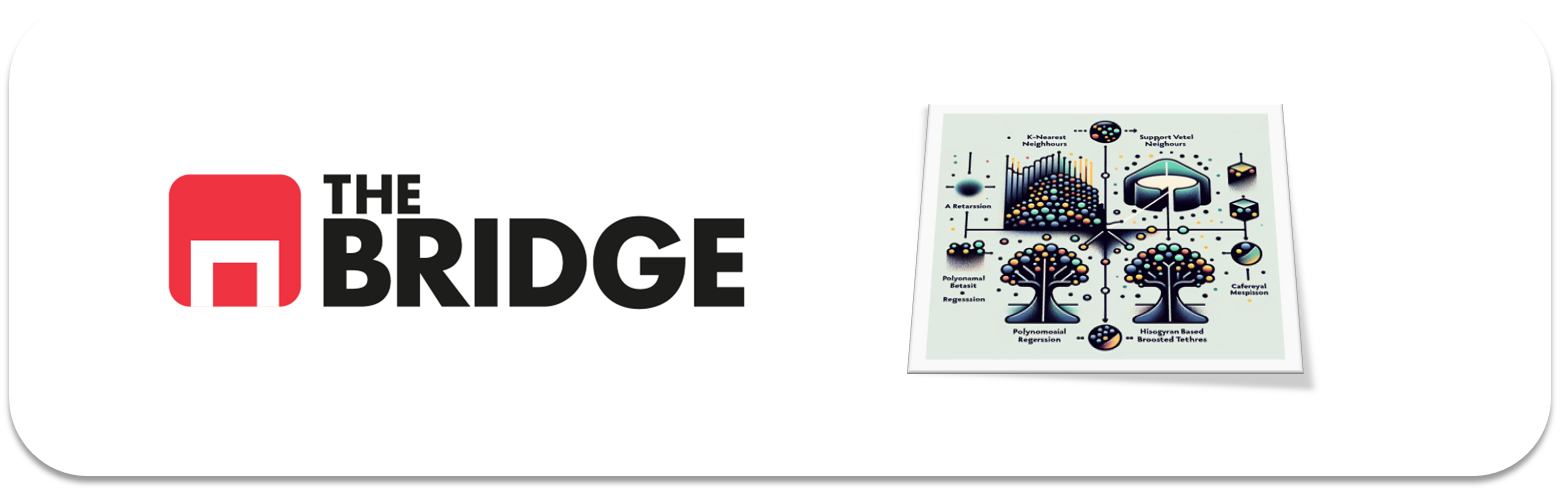

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [71]:
import bootcampviztools as bt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [43]:
#Cargamos el dataset
df = pd.read_csv('./data/wines_dataset.csv', sep = '|')

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.5              0.21         0.26            9.25      0.034   
1            8.3              0.16         0.37            7.90      0.025   
2            6.8              0.18         0.38            1.40      0.038   
3            6.1              0.26         0.25            2.90      0.047   
4            7.5              0.63         0.27            2.00      0.083   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 73.0                 142.0  0.99450  3.05       0.37   
1                 38.0                 107.0  0.99306  2.93       0.37   
2                 35.0                 111.0  0.99180  3.32       0.59   
3                289.0                 440.0  0.99314  3.44       0.64   
4                 17.0                  91.0  0.99616  3.26       0.58   

   alcohol  quality  class  
0     11.4        6  white  
1     11.9        6  white  
2     11.2        7  white  
3     10.5        3  white  
4      9.8        6    red

In [44]:
# Vemos la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [45]:
# Calculamos la cardinalidad
cardinalidad = df.nunique()
print(cardinalidad)

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
class                     2
dtype: int64


Sin nulos y las variables numéricas menos class, que es categórica.

Se definen los targets y se observa la distribución.

In [46]:
# Se define el target de clasificacion y regresion
target_clas = 'quality'
target_reg = 'alcohol'

<Axes: xlabel='alcohol', ylabel='Count'>

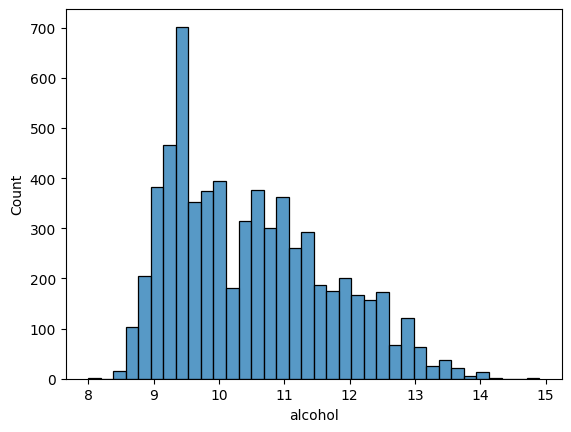

In [47]:
sns.histplot(df[target_reg])
# Desbalanceado un poco a la izquerda, pero no es crítico.

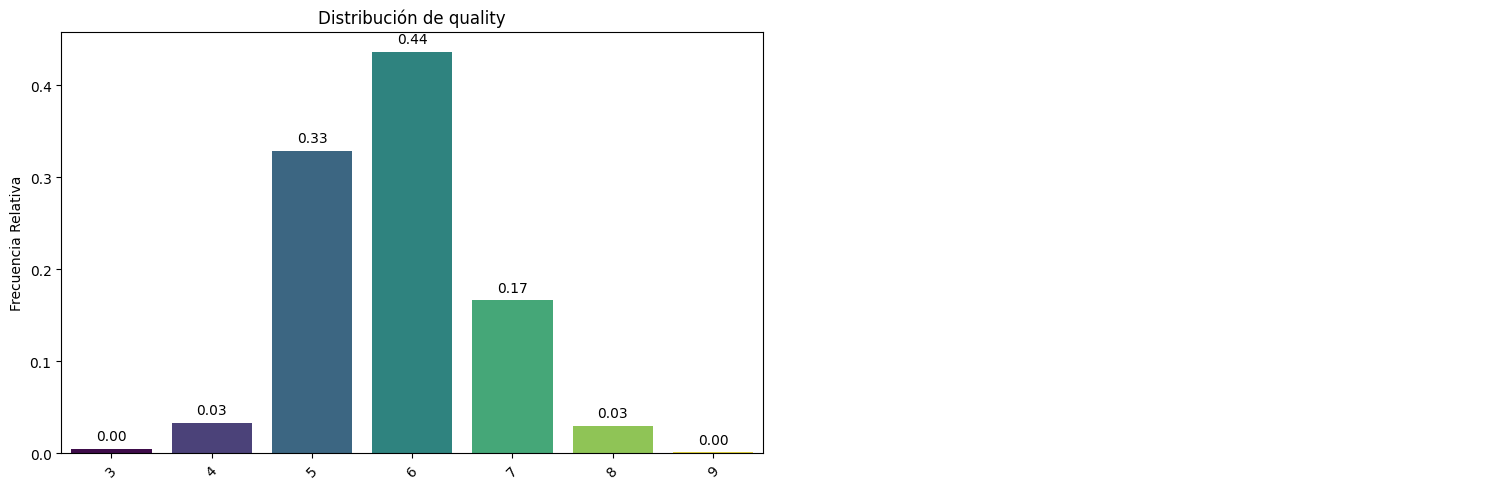

In [48]:
bt.pinta_distribucion_categoricas(df, [target_clas], mostrar_valores= True, relativa= True)
# Sigue una distribucion normal, no hay valores extremos

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

Dividir en train y test

In [49]:
# Separar en train y test
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

Hacer un mini EDA

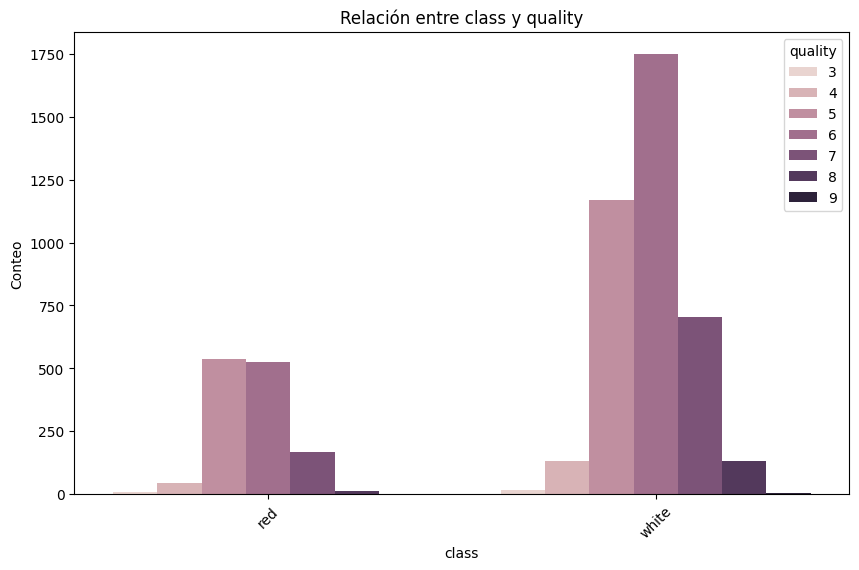

In [50]:
bt.plot_categorical_relationship_fin(train_set, cat_col1='class', cat_col2=target_clas)

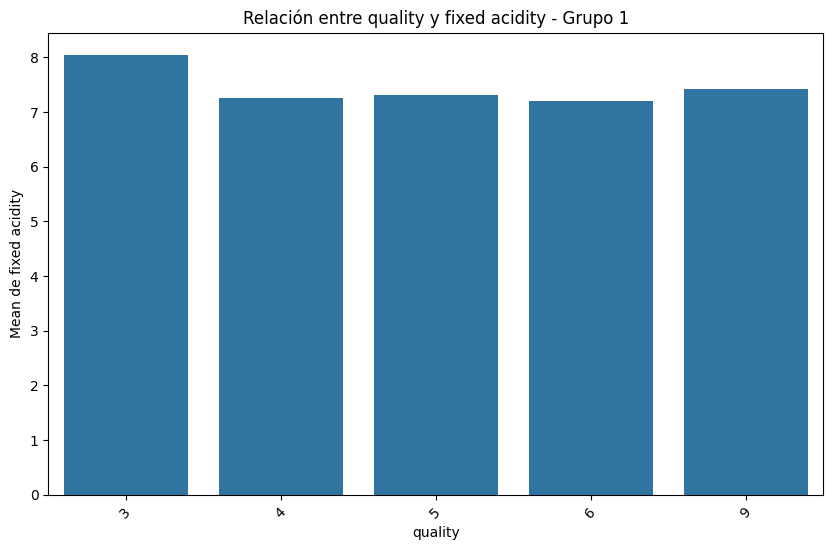

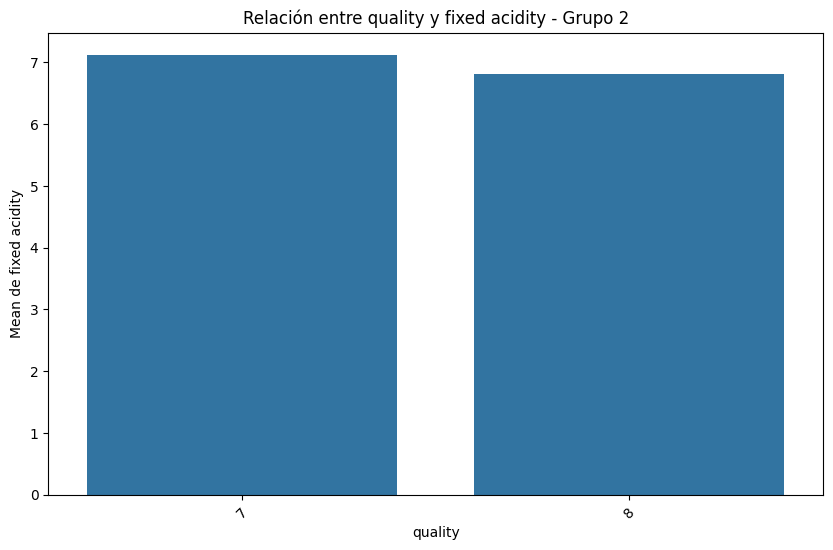

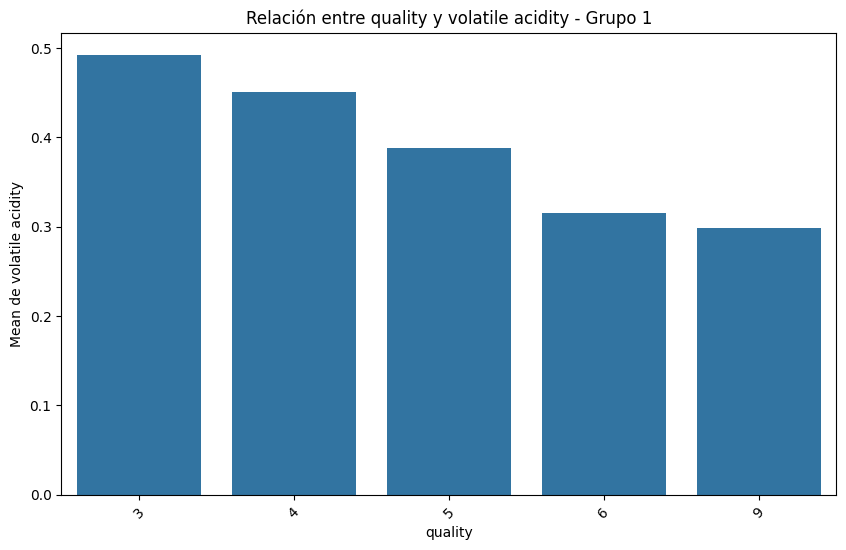

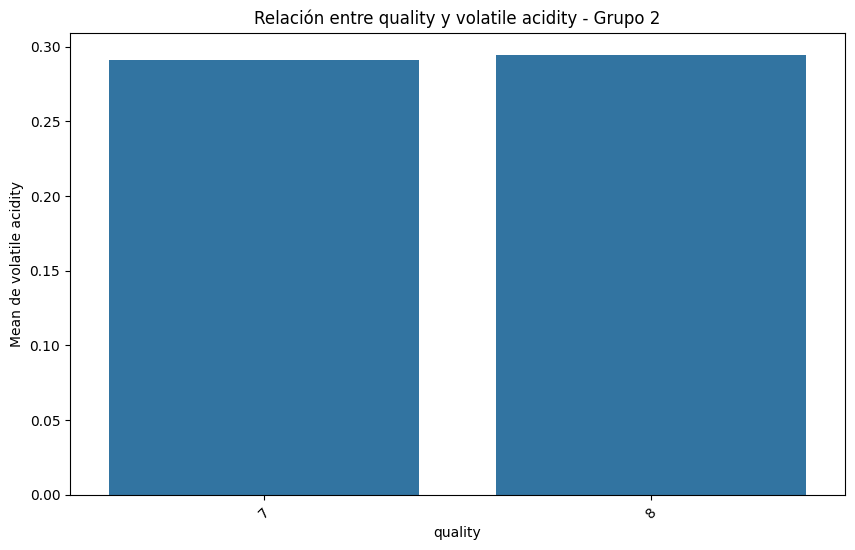

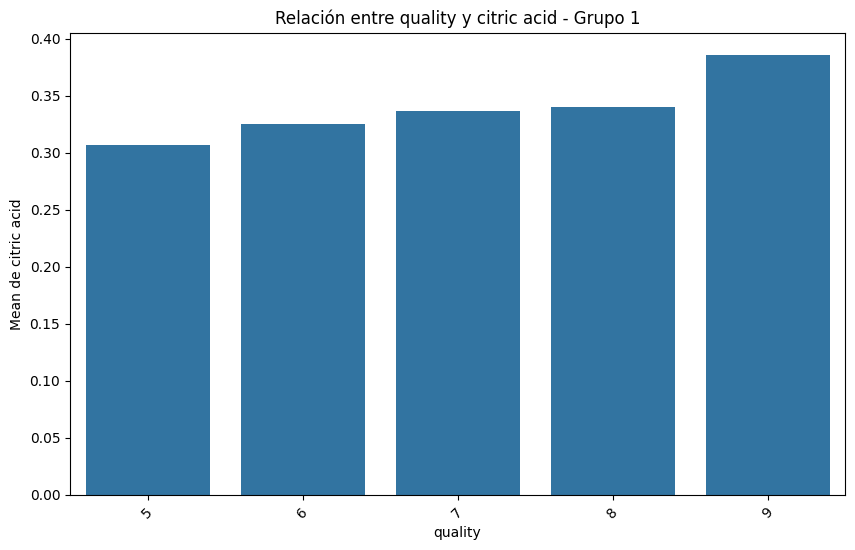

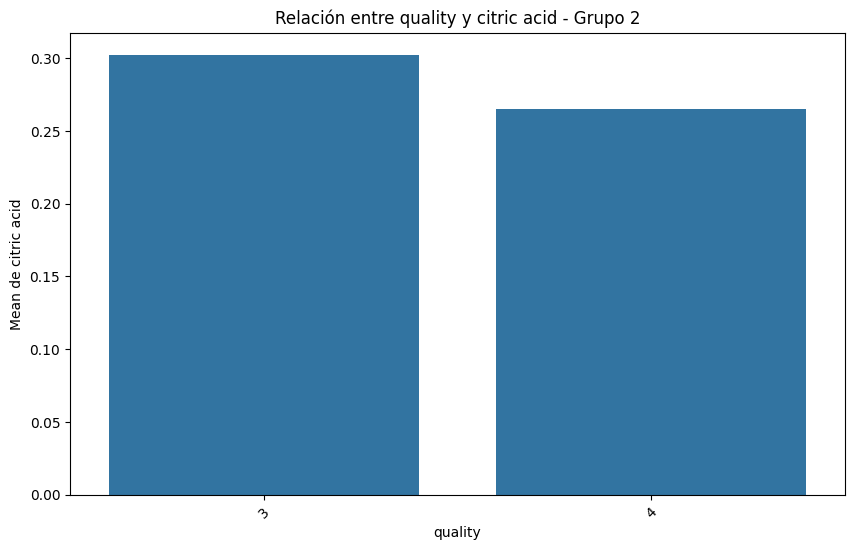

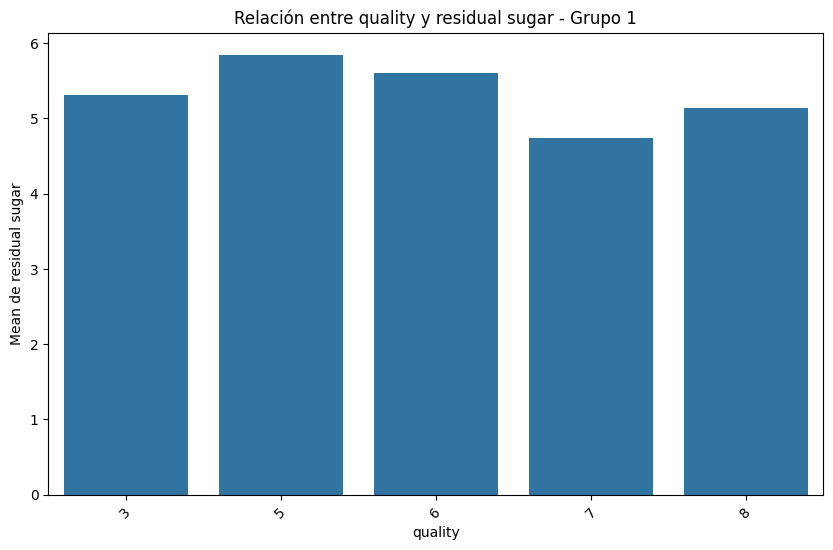

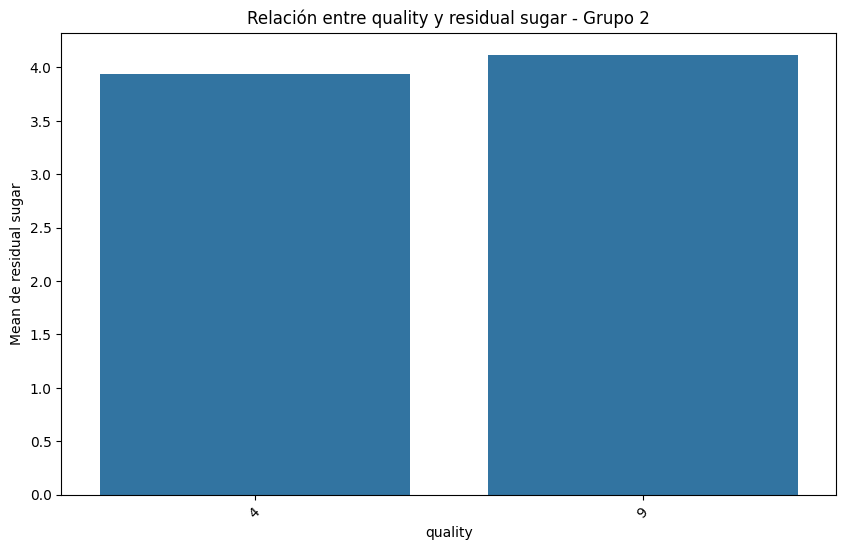

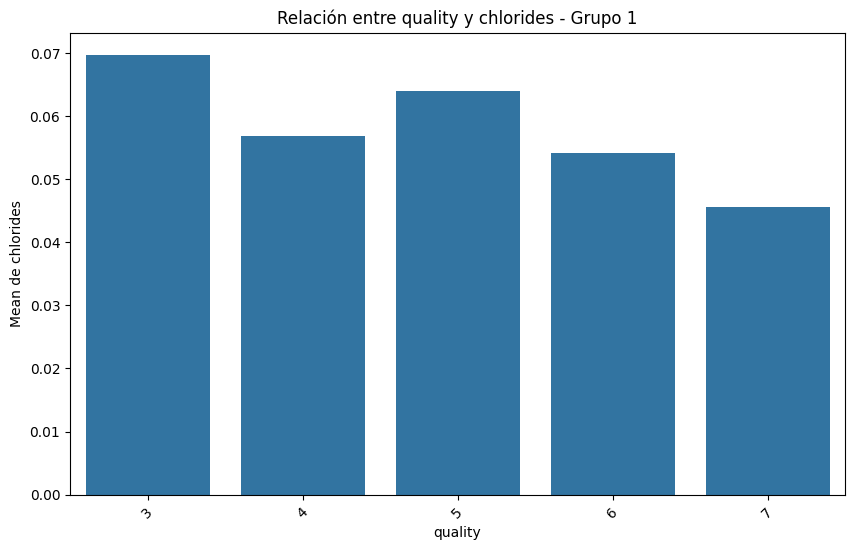

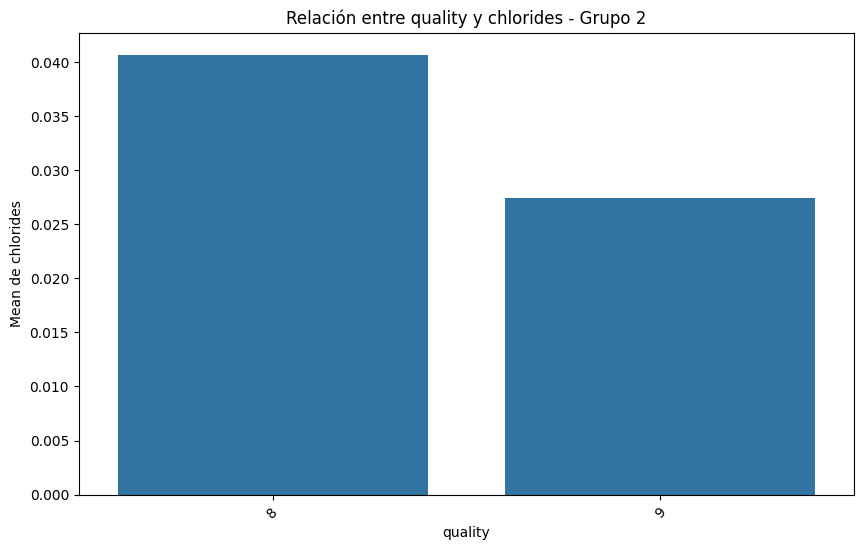

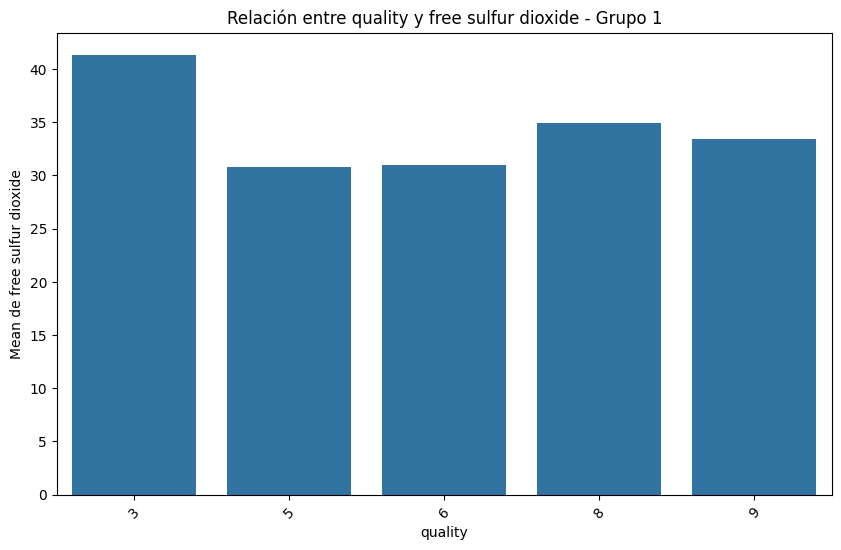

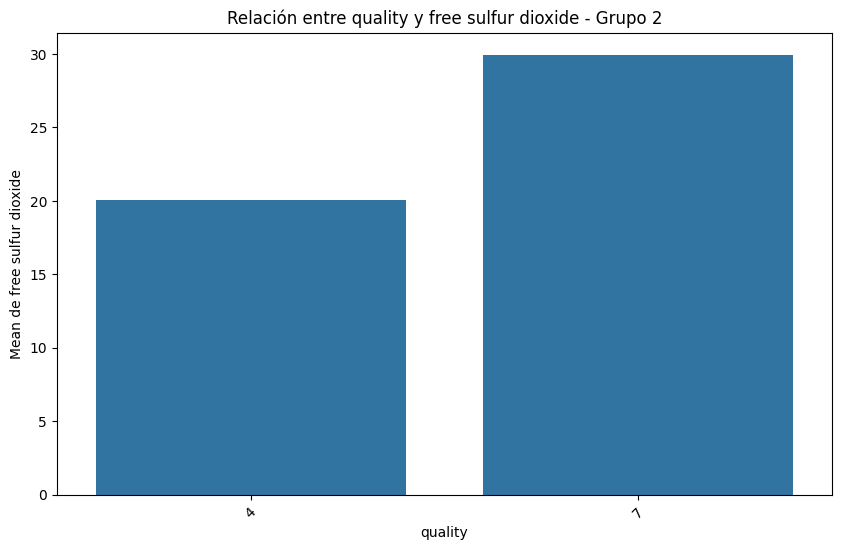

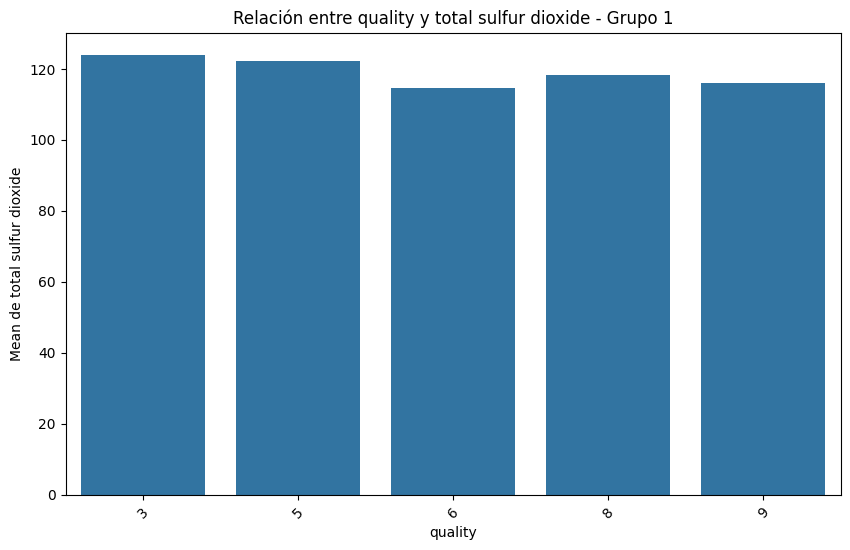

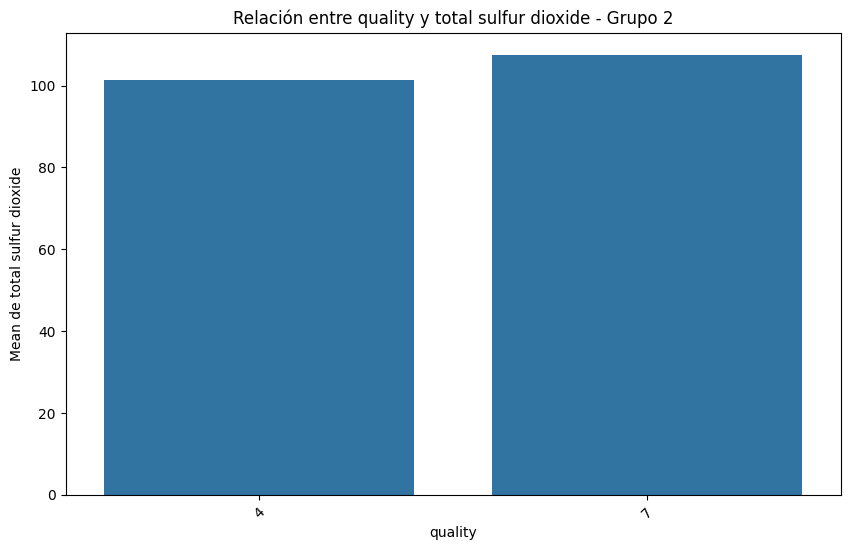

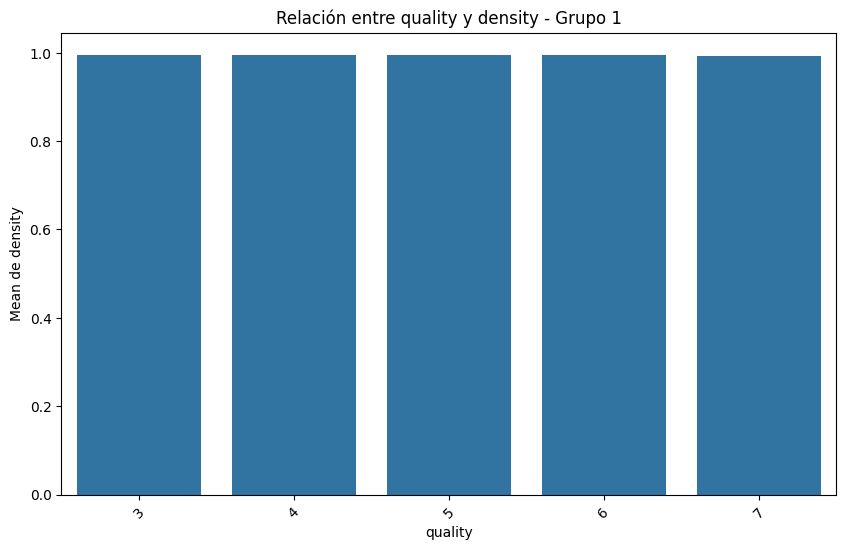

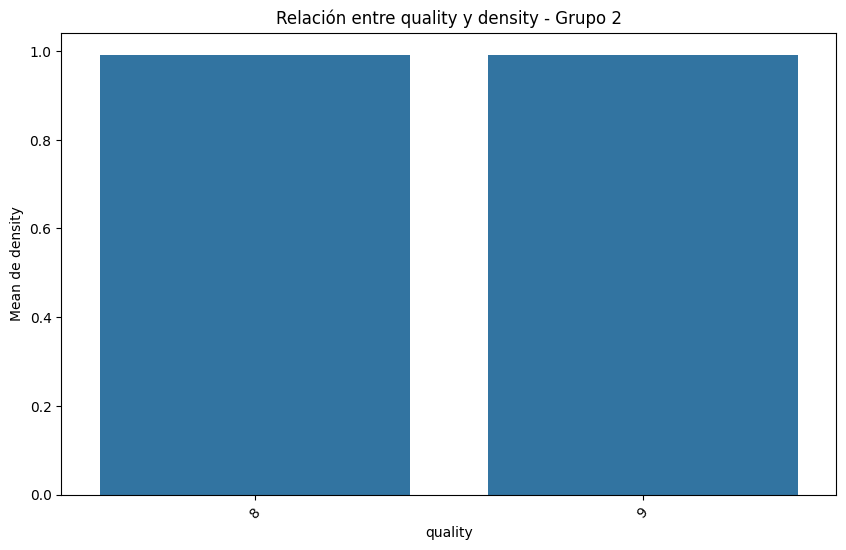

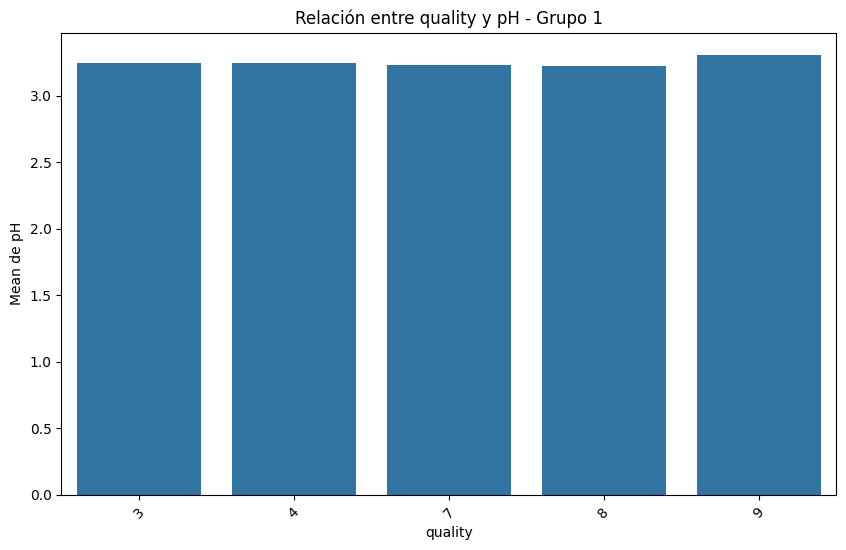

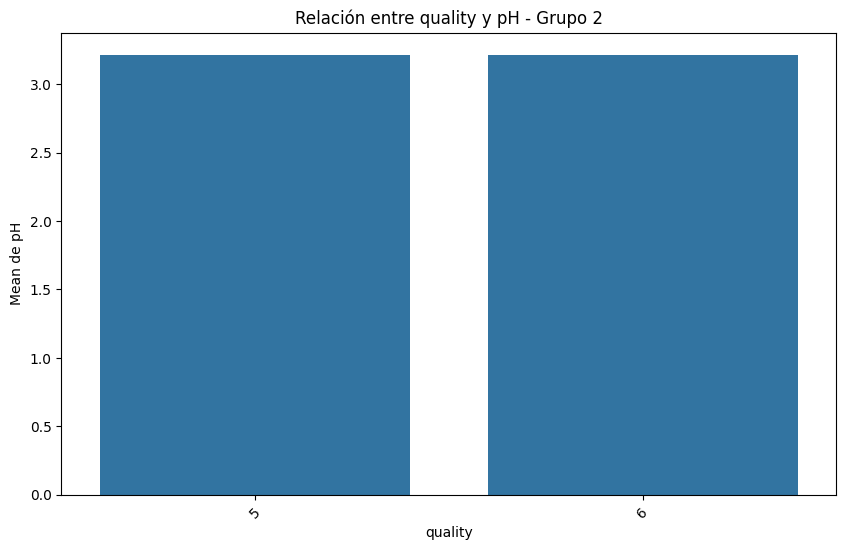

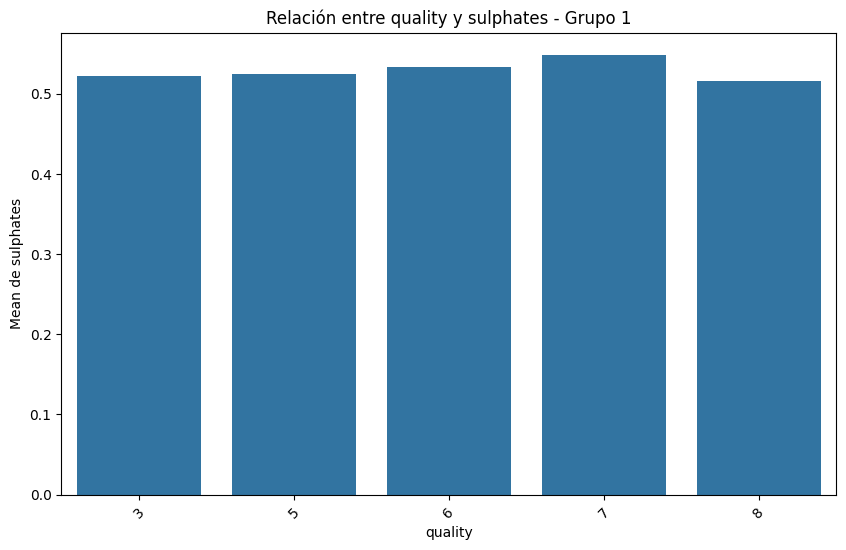

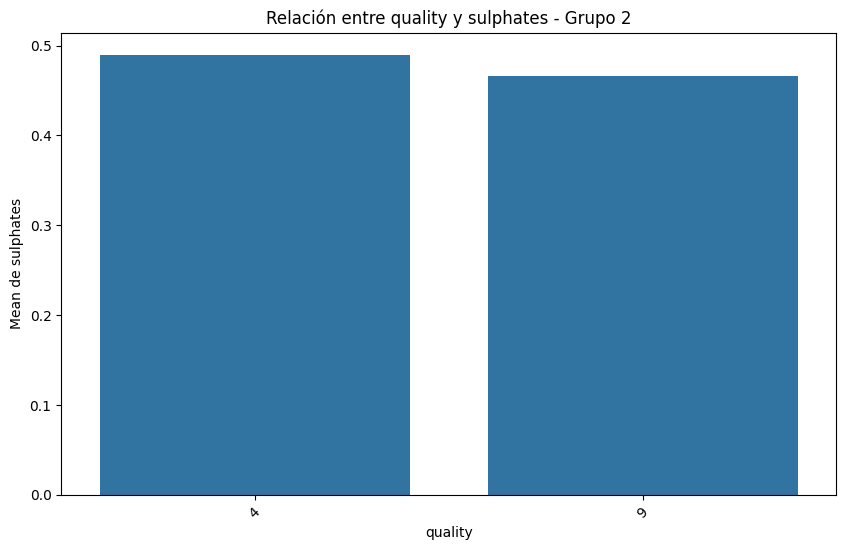

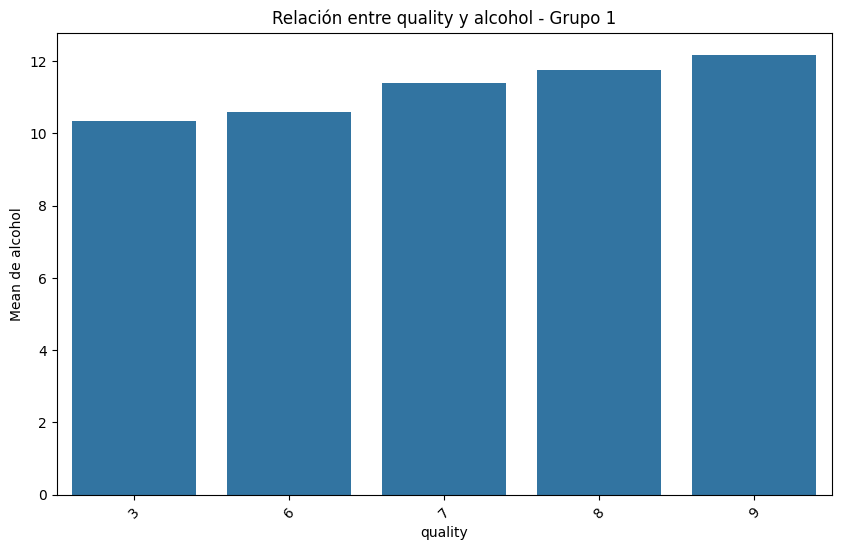

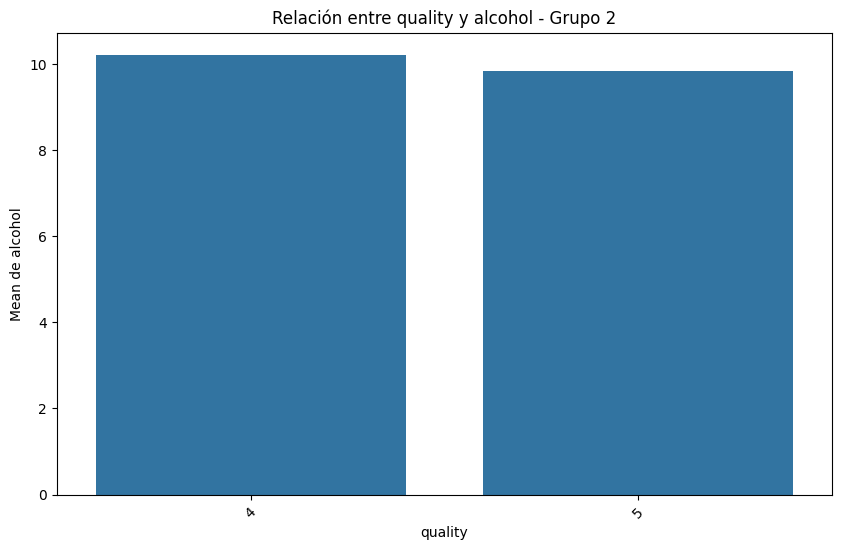

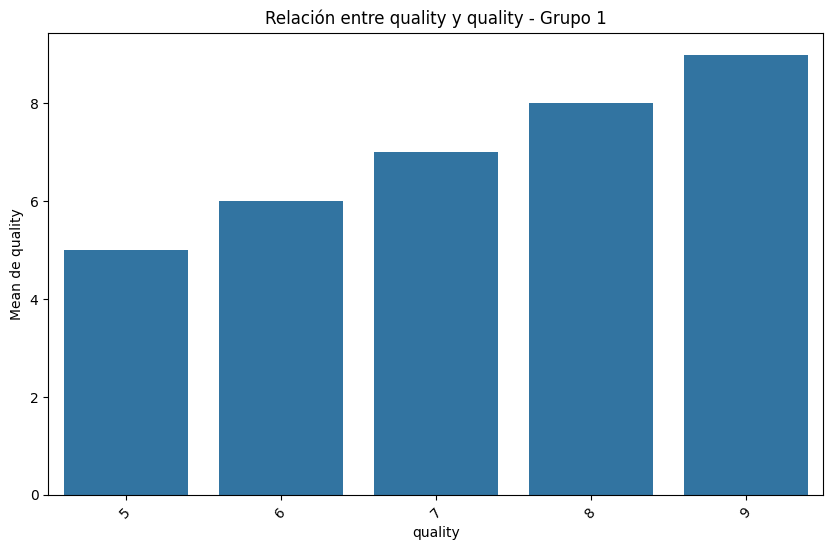

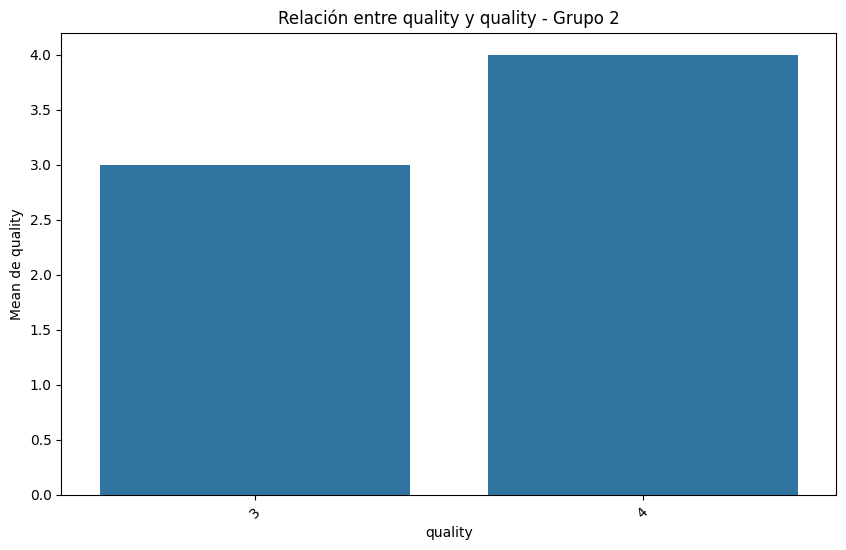

In [51]:
columnas = df.columns

for c in columnas:
    if c != 'class':
        bt.plot_categorical_numerical_relationship(train_set, categorical_col=target_clas, numerical_col=c)

Ahora se hace la transformación de la categórica.

In [52]:
train_set["class"] = train_set["class"].map({"white": 0, "red": 1})
test_set["class"] = test_set["class"].map({"white": 0, "red": 1})

Hacemos un escalado para los modelos como knn.

In [53]:
# Escalar 
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [54]:
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns)
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns)

Se genera X,y del train (escalado y no escalado) y test.

In [55]:
X_train = train_set.drop(target_clas, axis = 1)
X_train_scaled = train_set_scaled.drop(target_clas, axis = 1)
y_train = train_set[target_clas]

X_test = test_set.drop(target_clas, axis = 1)
X_test_scaled = test_set_scaled.drop(target_clas, axis = 1)
y_test = test_set[target_clas]

Hacer el baseline con knn probando dos números de vecinos diferentes.

In [56]:
# Instanciar el modelo KNN con un valor base de k=5
knn_baseline_5 = KNeighborsClassifier(n_neighbors=5)

knn_baseline_5.fit(X_train_scaled, y_train)
y_train_pred_5 = knn_baseline_5.predict(X_train_scaled)

print("Classification Report - KNN Baseline (Train Set):")
print(classification_report(y_train, y_train_pred_5))

Classification Report - KNN Baseline (Train Set):
              precision    recall  f1-score   support

           3       0.75      0.12      0.21        24
           4       0.53      0.31      0.39       173
           5       0.71      0.77      0.74      1706
           6       0.71      0.78      0.74      2274
           7       0.72      0.58      0.64       869
           8       0.71      0.18      0.29       146
           9       0.00      0.00      0.00         5

    accuracy                           0.71      5197
   macro avg       0.59      0.39      0.43      5197
weighted avg       0.70      0.71      0.70      5197



c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [57]:
# Instanciar el modelo KNN con un valor base de k=10
knn_baseline_10 = KNeighborsClassifier(n_neighbors=10)

knn_baseline_10.fit(X_train_scaled, y_train)
y_train_pred_10 = knn_baseline_10.predict(X_train_scaled)

print("Classification Report - KNN Baseline (Train Set):")
print(classification_report(y_train, y_train_pred_10))

Classification Report - KNN Baseline (Train Set):
              precision    recall  f1-score   support

           3       1.00      0.08      0.15        24
           4       0.67      0.13      0.21       173
           5       0.65      0.73      0.69      1706
           6       0.64      0.70      0.67      2274
           7       0.61      0.49      0.54       869
           8       0.43      0.06      0.11       146
           9       0.00      0.00      0.00         5

    accuracy                           0.64      5197
   macro avg       0.57      0.31      0.34      5197
weighted avg       0.63      0.64      0.62      5197



c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Hacer cross val con otros modelos para poder comparar y elegir el mejor.

In [58]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5), # Era mejor que con 10
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, max_depth=5)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled if name in ["KNN", "Logistic Regression"] else X_train, y_train, cv=5, scoring='balanced_accuracy')
    print(f"{name}: Balanced Accuracy = {np.mean(scores):.4f}")

KNN: Balanced Accuracy = 0.2630
Logistic Regression: Balanced Accuracy = 0.2265
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score -5.388110
[LightGBM] [Info] Start training from score -3.405295
[LightGBM] [Info] Start training from score -1.114372
[LightGBM] [Info] Start training from score -0.825957
[LightGBM] [Info] Start training from score -1.788637
[LightGBM] [Info] Start training from score -3.570375
[LightGBM] [Info] Start training from score -6.946255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Se prueba con class weight balanced.

In [59]:
models2 = {
    "KNN": KNeighborsClassifier(n_neighbors=5), # Era mejor que con 10
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(random_state=42, max_depth=5, class_weight='balanced')
}

for name, model in models2.items():
    scores = cross_val_score(model, X_train_scaled if name in ["KNN", "Logistic Regression"] else X_train, y_train, cv=5, scoring='balanced_accuracy')
    print(f"{name}: Balanced Accuracy = {np.mean(scores):.4f}")

KNN: Balanced Accuracy = 0.2630
Logistic Regression: Balanced Accuracy = 0.3826
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1478
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

Se prueba a equilibrar las clases con SMOTE.

In [60]:
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts(True)

X_train_scaled_smote = scaler.fit_transform(X_train_smote)  

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5), # Era mejor que con 10
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, max_depth=5)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled_smote if name in ["KNN", "Logistic Regression"] else X_train_smote, y_train_smote, cv=5, scoring='balanced_accuracy')
    print(f"{name}: Balanced Accuracy = {np.mean(scores):.4f}")

KNN: Balanced Accuracy = 0.8054
Logistic Regression: Balanced Accuracy = 0.5390
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2807
[LightGBM] [Info] Number of data points in the train set: 12734, number of used features: 12
[LightGBM] [Info] Start training from score -1.945989
[LightGBM] [Info] Start training from score -1.945439
[LightGBM] [Info] Start training from score -1.945989
[LightGBM] [Info] Start training from score -1.945989
[LightGBM] [Info] Start training from score -1.945989
[LightGBM] [Info] Start training from score -1.945989
[LightGBM] [Info] Start training from score -1.945989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

Los mejores resultados han sido con SMOTE (aunque luego con el test probablemente no sean tan buenos). El más consistente en todos los casos ha sido kNN y LightGBM. Se definen los mejores hiperparámetros.

In [61]:
knn_model = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs_knn = GridSearchCV(knn_model, param_grid_knn, scoring='balanced_accuracy', cv=5)
gs_knn.fit(X_train_scaled_smote, y_train_smote)

best_knn = gs_knn.best_estimator_
print(f"Best params for KNN: {gs_knn.best_params_}")

Best params for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Se comprueba el rendimiento con el test.

c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.12      0.33      0.17        43
           5       0.68      0.53      0.60       432
           6       0.65      0.41      0.50       562
           7       0.40      0.61      0.48       210
           8       0.21      0.55      0.31        47
           9       0.00      0.00      0.00         0

    accuracy                           0.49      1300
   macro avg       0.29      0.35      0.29      1300
weighted avg       0.58      0.49      0.51      1300



c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tebar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

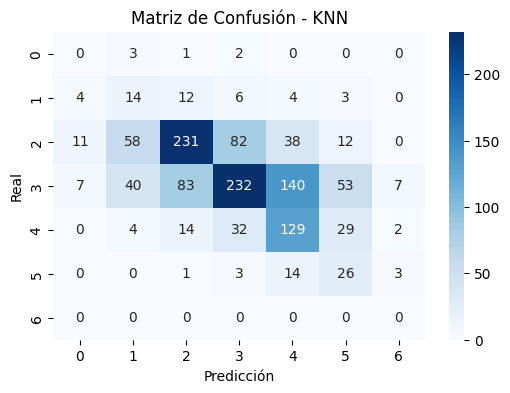

In [62]:
y_pred = best_knn.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [63]:
train_set.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1916            7.9              0.18         0.40             2.2      0.049   
947             7.1              0.18         0.74            15.6      0.044   
877             7.6              0.51         0.24             1.2      0.040   
2927            6.0              0.25         0.28             7.7      0.053   
6063            9.0              0.38         0.41             2.4      0.103   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1916                 38.0                  67.0  0.99600  3.33       0.93   
947                  44.0                 176.0  0.99960  3.38       0.67   
877                  10.0                 104.0  0.99200  3.05       0.29   
2927                 37.0                 132.0  0.99489  3.06       0.50   
6063                  6.0                  10.0  0.99604  3.13       0.58   

      alcohol  quality  class  
1916     11.3        5      1  
947       9.0        6      0  
877      10.8        6      0  
2927      9.4        6      0  
6063     11.9        7      1

Una vez on el df dividido en train y test, se hace un pequeño EDA, ahora teniendo en cuenta que el target es el nivel de alcohol.

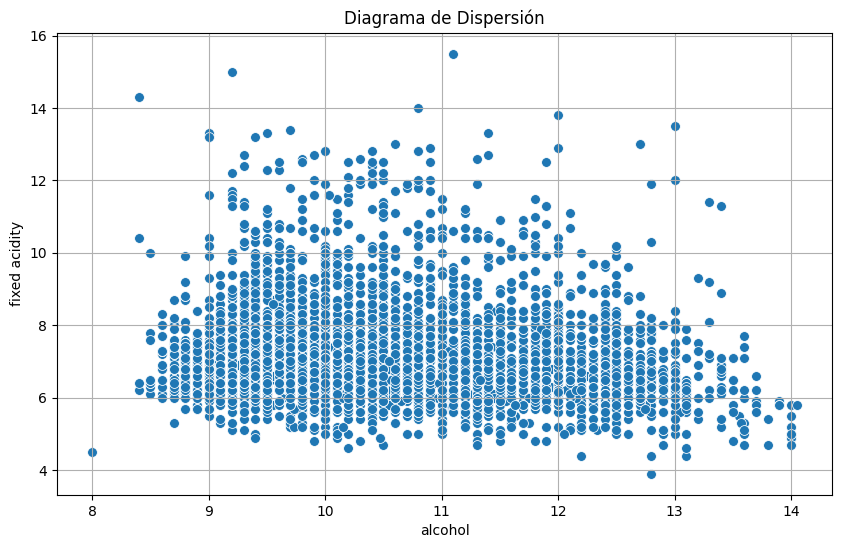

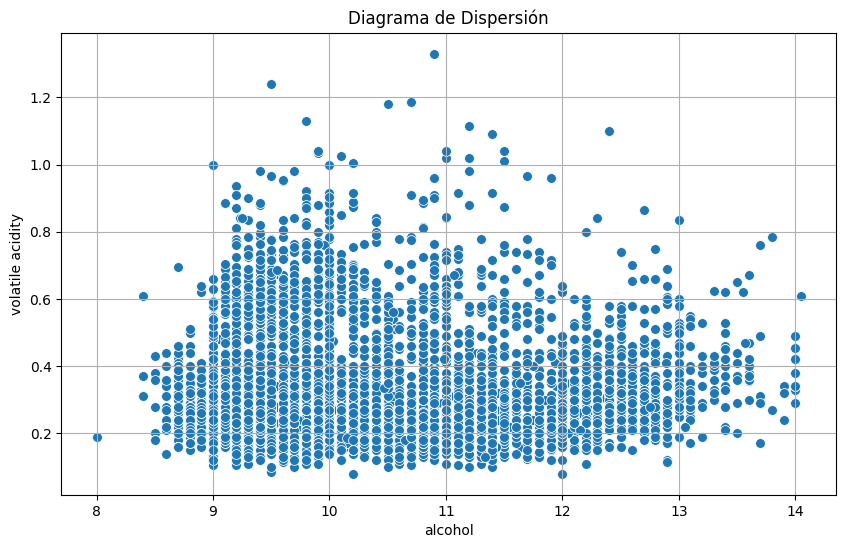

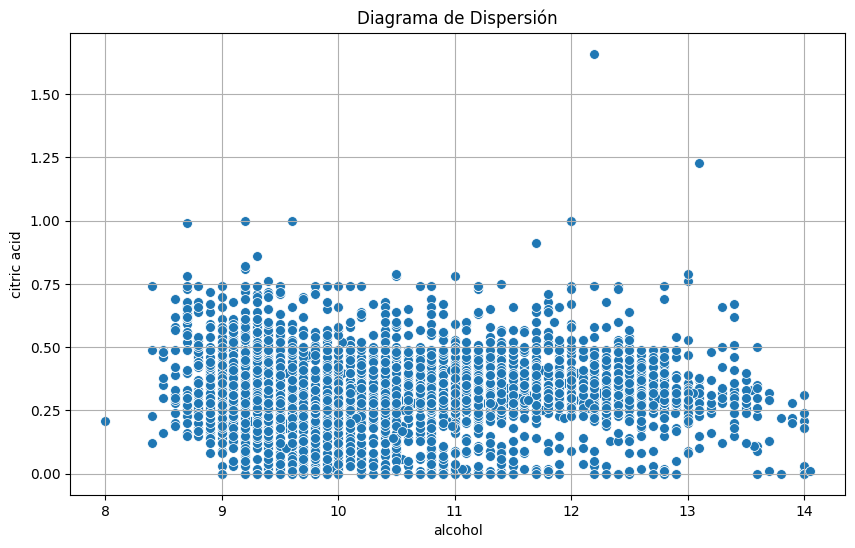

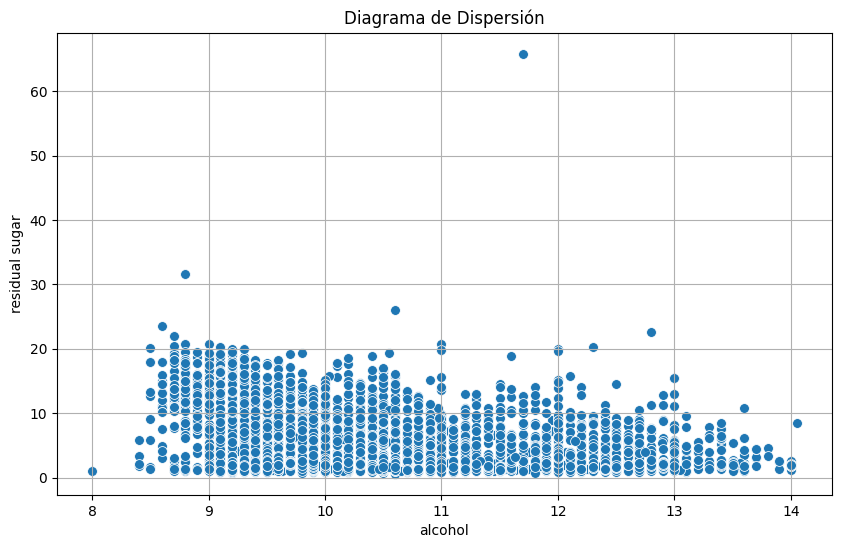

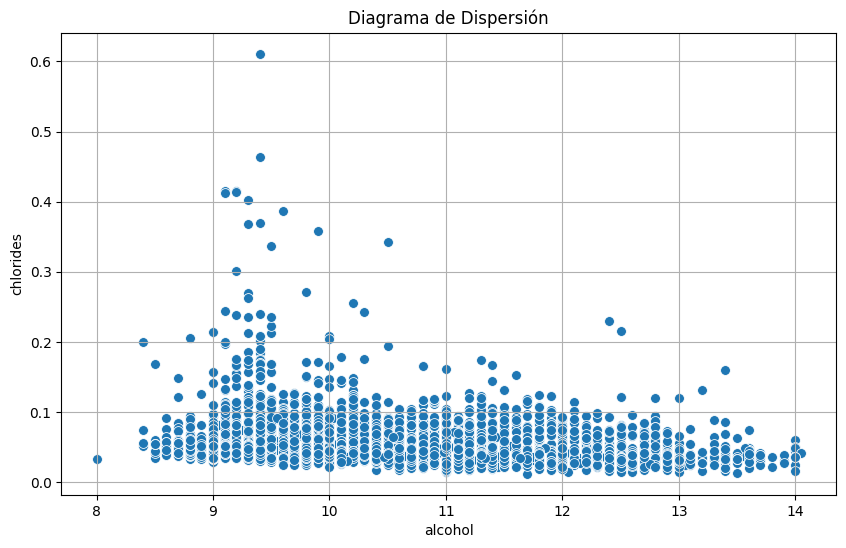

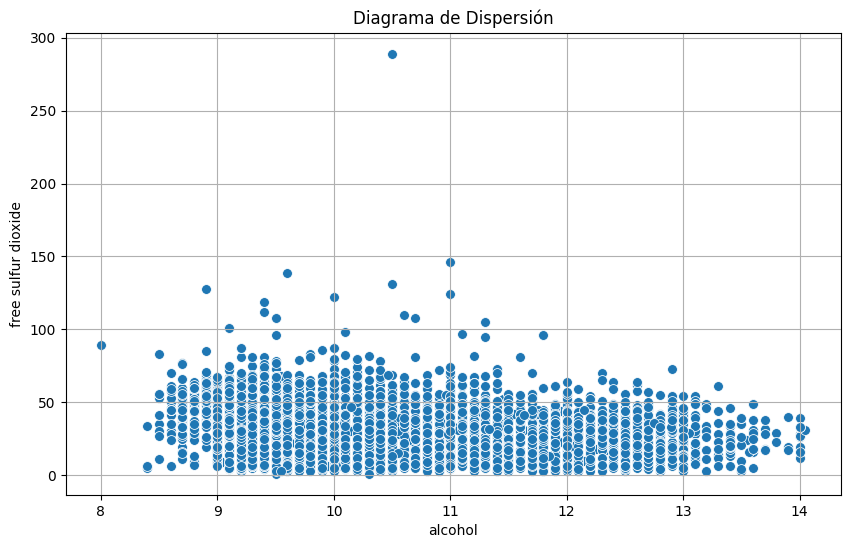

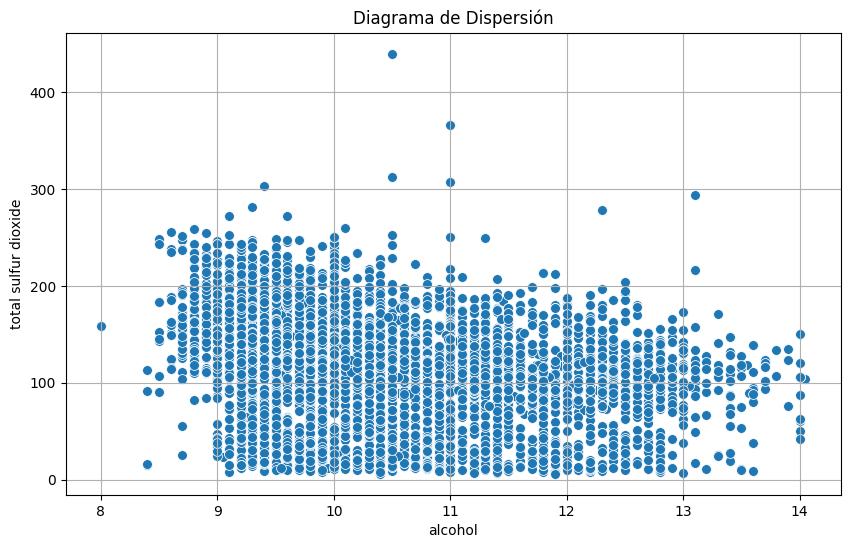

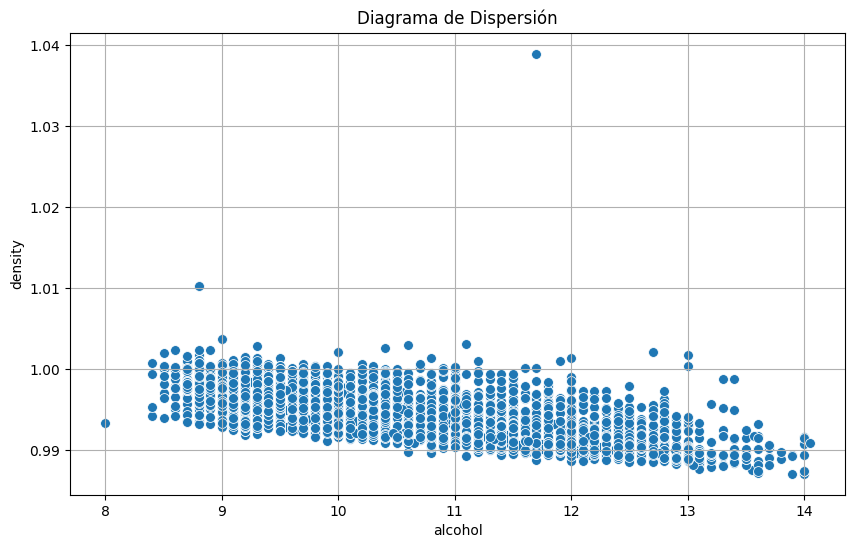

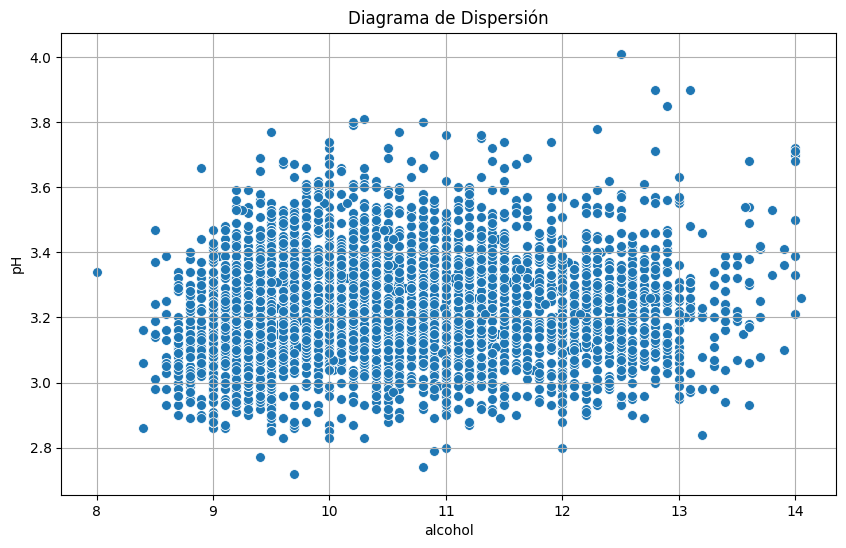

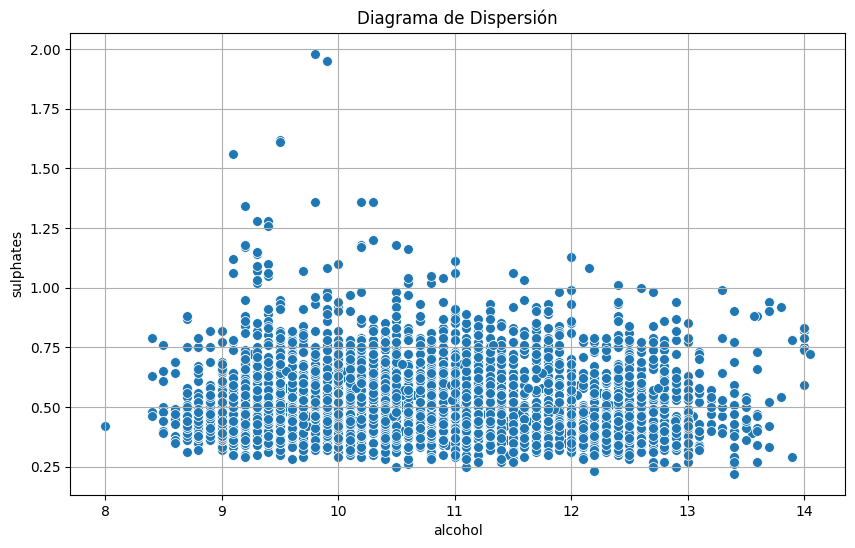

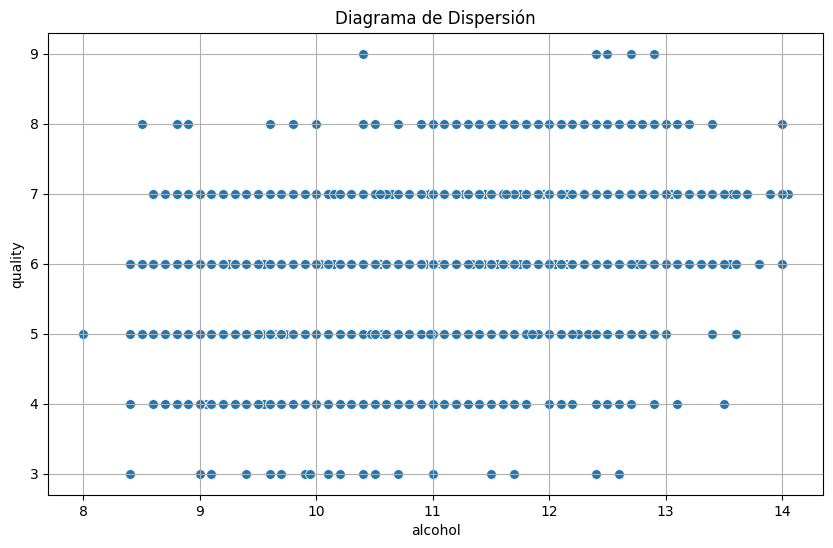

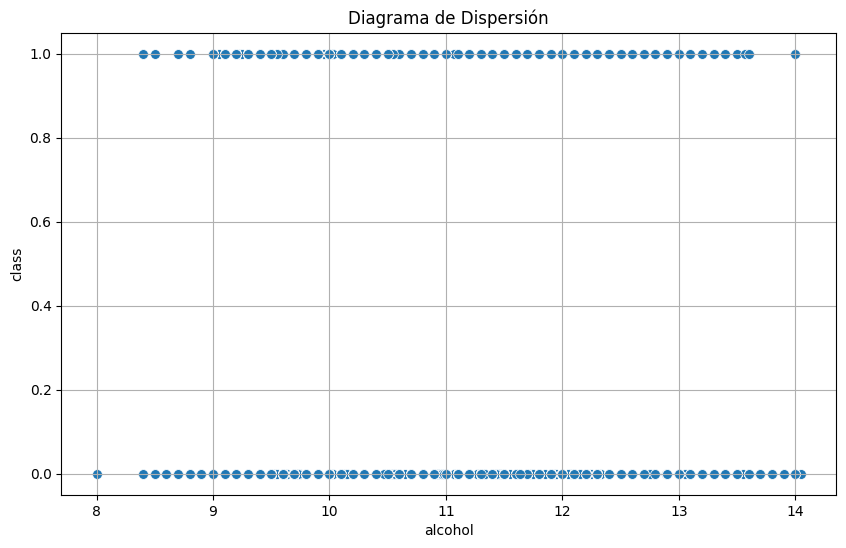

In [64]:
for c in train_set.columns:
        if c != 'alcohol':
            bt.grafico_dispersion_con_correlacion(train_set,columna_x='alcohol', columna_y=c)

Una vez vista la distribución, escalamos y separamos en X e y teniendo en cuenta el nuevo target.

In [65]:
# Escalar 
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [66]:
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns)
test_set_scaled = pd.DataFrame(test_set_scaled, columns=test_set.columns)

In [67]:
X_train = train_set.drop(target_reg, axis = 1)
X_train_scaled = train_set_scaled.drop(target_reg, axis = 1)
y_train = train_set[target_reg]

X_test = test_set.drop(target_reg, axis = 1)
X_test_scaled = test_set_scaled.drop(target_reg, axis = 1)
y_test = test_set[target_reg]

Ahora hacemos el baseline con knn

In [70]:
# Instanciar el modelo KNN con un valor base de k=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)  # Aquí y_train_reg es un target numérico continuo
y_pred_reg = knn_reg.predict(X_test_scaled)

# Métricas de regresión
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.4195
Mean Squared Error (MSE): 0.3404
Root Mean Squared Error (RMSE): 0.5834
R² Score: 0.7585


Probar varios modelos para ver cual es mejor.

In [73]:

models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(random_state=42, max_depth=5),
    "LightGBM": LGBMRegressor(random_state=42, max_depth=5)
}

# con R2
for name, model in models.items():
    if name == "KNN":  # Solo escalar para KNN
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:  # No escalar para LightGBM ni Random Forest
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    print(f"{name}: R² = {np.mean(scores):.4f}")

# para mse y rmse
for name, model in models.items():
    if name == "KNN":  # Solo escalar para KNN
        mse_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:  # No escalar para LightGBM ni Random Forest
        mse_scores = cross_val_score(model, X_train, y_train, cv=5)

    rmse = np.sqrt(mse)
    print(f"{name}: MSE = {mse:.4f}, RMSE = {rmse:.4f}")

KNN: R² = 0.7399
Random Forest: R² = 0.7497
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score 10.500495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

Del mejor que ha sido lightgbm, se obtienen los mejores hiperparámetros y se testea.

In [74]:
lgb_model = LGBMRegressor(random_state=42)

param_grid_lgb = {
    'num_leaves': [15, 30, 60],  
    'n_estimators': [100, 200, 500],  
    'max_depth': [3, 5], 
}

gs_lgb = GridSearchCV(lgb_model, param_grid_lgb, scoring='neg_mean_squared_error', cv=5)

gs_lgb.fit(X_train_scaled, y_train)  # Asumiendo que estás utilizando datos escalados

# Obtener el mejor modelo y sus parámetros
best_lgb = gs_lgb.best_estimator_
print(f"Best params for LightGBM: {gs_lgb.best_params_}")

y_pred_lgb = best_lgb.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lgb)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1444
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 12
[LightGBM] [Info] Start training from score 10.500495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Ahora un análisis de errores.

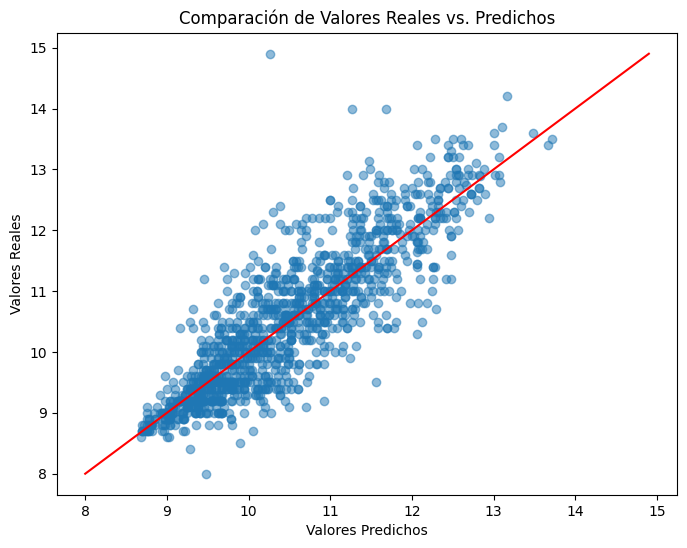

In [75]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

plot_predictions_vs_actual(y_test, y_pred_reg)

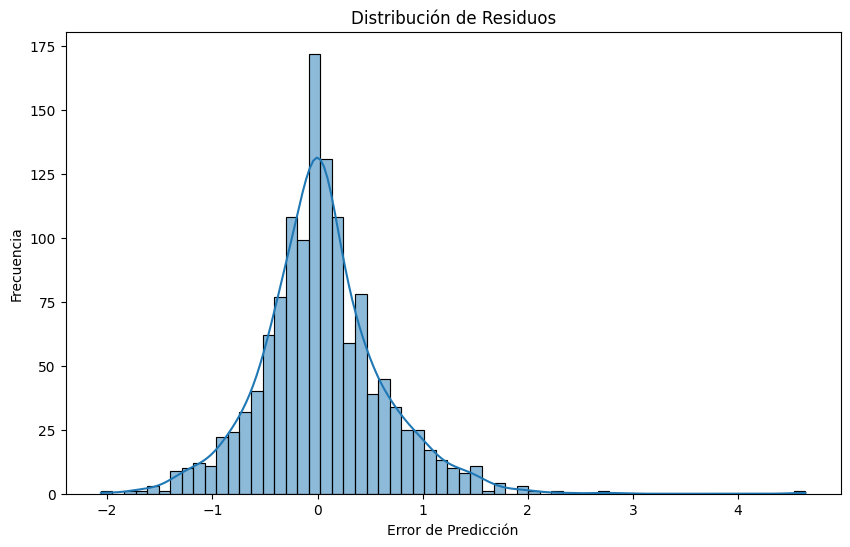

In [76]:
# Calcular residuos
residuos = y_test - y_pred_reg

# Visualización de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

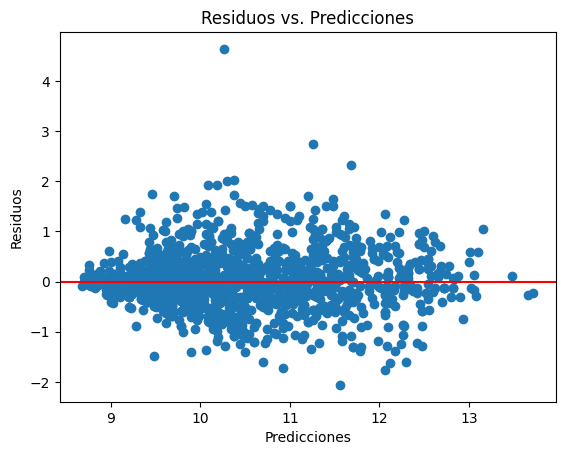

In [77]:
# Gráfica de dispersión de residuos
plt.scatter(y_pred_reg, residuos)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()